<a href="https://colab.research.google.com/github/seyoung911/ClearWater/blob/master/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "/content/drive/My Drive/Colab Notebooks/mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data) #10,000개
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1] 0~1 사이의 값으로 변환하기
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_x  = np.empty((size_row * size_col, num_image), dtype=float) #각 이미지 데이터 벡터 리스트
list_label  = np.empty(num_image, dtype=int) #각 이미지 데이터의 레이블 리스트

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:]) # 벡터 데이터 읽어오기 
    im_vector   = normalize(im_vector) # nomalize 시켜주기

    list_label[count]       = label
    list_x[:, count]    = im_vector #normailize시켜준 데이터벡터 리스트에 저장하기 

    count += 1


In [0]:
file_data2   = "/content/drive/My Drive/Colab Notebooks/mnist_2.csv"
handle_file2 = open(file_data2, "r")
data2        = handle_file2.readlines()
handle_file2.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image2   = len(data2) #9000개
count2       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1] 0~1 사이의 값으로 변환하기
#

#
# make a matrix each column of which represents an images in a vector form
#
list_x2  = np.empty((size_row * size_col, num_image2), dtype=float) #각 이미지 데이터 벡터 리스트
list_label2  = np.empty(num_image2, dtype=int) #각 이미지 데이터의 레이블 리스트

for line in data2:

    line_data   = line.split(',')
    label2       = line_data[0]
    im_vector2   = np.asfarray(line_data[1:]) # 벡터 데이터 읽어오기 
    im_vector2   = normalize(im_vector2) # nomalize 시켜주기

    list_label2[count2]       = label2
    list_x2[:, count2]    = im_vector2 #normailize시켜준 데이터벡터 리스트에 저장하기 

    count2 += 1


In [0]:
import math
import random

# 시그모이드 함수 
def sigmoid(z):
  result = 1 / (1 + np.exp(-z))
  return result


# 파라미터 matrix 정의 / initialization :  0이 아닌 랜덤 값, 정규분포로 초기화

sigma = 0.5
mu = 0

u_matrix = sigma * np.random.randn(196,785) + mu
#print(u_matrix)  
v_matrix = sigma * np.random.randn(10,197) + mu
#print(v_matrix)


h_list = []
h_matrix = []
z_list = []
yhat_list = []
yhat_list2 = []
y_list = []
x_list = []



x_temp = 0
y_temp = 0
yhat_temp = 0
z_temp = 0
h_temp = 0
count = 0


 # iteration 하나당 데이터 하나 로드

for j in range(1000):
    x_temp = 0
    y_temp = 0
    yhat_temp = 0
    z_temp = 0
    h_temp = 0
    h_list.clear()
    z_list.clear()
    yhat_list.clear()
    y_list.clear()
    x_list.clear()
  
  # x_list 채우기 ( 785 x 1 )
    x_list.append(1) # bias 1로 채움 
    for i in range(784):
      x_temp = list_x[i][j]
      x_list.append(x_temp)
  
  # y_list 채우기 = u_matrix * x_list  ( 196  x 1 ) + yhat_list 채우기
    for i in range(196):
      y_temp = 0
      for k in range(785):
        y_temp += u_matrix[i][k] * x_list[k]
      y_list.append(y_temp)
  
  # yhat_list 채우기 ( 197 x 1 )
    yhat_list.append(1) # bias 추가하기
    for i in range(196):
      yhat_temp = sigmoid(y_list[i])
      yhat_list.append(yhat_temp)
      yhat_list2.append(yhat_temp)

  #z_list 채우기 (10 x 1)
    for i in range(10):
      z_temp = 0
      for k in range(197):
        z_temp+= v_matrix[i][k] * yhat_list[k]
      z_list.append(z_temp)

  #h_list  채우기( 10 x 1 )
    for i in range(10):
      h_temp = sigmoid(z_list[i])
      h_list.append(h_temp)
    h_matrix.append(h_list)

    






In [0]:
# NN ,Back propagation >> gradient descent / update parameter / 
# Objective function 정의  = Loss function  & 위에서의 각 iteration에서의 h를 이용해 testing_loss_List 채우기

sum_for_v0x = 0
sum_for_v1x = 0
sum_for_v2x = 0
sum_for_v3x = 0
sum_for_v4x = 0
sum_for_v5x = 0
sum_for_v6x = 0
sum_for_v7x = 0
sum_for_v8x = 0
sum_for_v9x = 0

 
# Gradient Descent 위한 summation 구현
for k in range(10):
    sum_for_v0x += -list_label[j]*(1 - h_matrix[j][k])*yhat_list2[0]
    sum_for_v1x += -list_label[j]*(1 - h_matrix[j][k])*yhat_list2[1]
    sum_for_v2x += -list_label[j]*(1 - h_matrix[j][k])*yhat_list2[2]
    sum_for_v3x += -list_label[j]*(1 - h_matrix[j][k])*yhat_list2[3]
    sum_for_v4x += -list_label[j]*(1 - h_matrix[j][k])*yhat_list2[4]
    sum_for_v5x += -list_label[j]*(1 - h_matrix[j][k])*yhat_list2[5]
    sum_for_v6x += -list_label[j]*(1 - h_matrix[j][k])*yhat_list2[6]
    sum_for_v7x += -list_label[j]*(1 - h_matrix[j][k])*yhat_list2[7]
    sum_for_v8x += -list_label[j]*(1 - h_matrix[j][k])*yhat_list2[8]
    sum_for_v9x += -list_label[j]*(1 - h_matrix[j][k])*yhat_list2[9]
  
#v_matrix 갱신
for i in range(1000):
  for k in range(10):
    sum_for_v0x += -list_label[j]*(1 - h_matrix[j][k])*yhat_list2[0]

for i in range(1000):
  for k in range(10):
    sum_for_v1x += -list_label[j]*(1 - h_matrix[j][k])*yhat_list2[1]

for i in range(1000):
  for k in range(10):
    sum_for_v2x += -list_label[j]*(1 - h_matrix[j][k])*yhat_list2[2]

for i in range(1000):
  for k in range(10):
    sum_for_v3x += -list_label[j]*(1 - h_matrix[j][k])*yhat_list2[3]

for i in range(1000):
  for k in range(10):
    sum_for_v4x += -list_label[j]*(1 - h_matrix[j][k])*yhat_list2[4]

for i in range(1000):
  for k in range(10):
    sum_for_v5x += -list_label[j]*(1 - h_matrix[j][k])*yhat_list2[5]

for i in range(1000):
  for k in range(10):
    sum_for_v6x += -list_label[j]*(1 - h_matrix[j][k])*yhat_list2[6]

for i in range(1000):
  for k in range(10):
    sum_for_v7x += -list_label[j]*(1 - h_matrix[j][k])*yhat_list2[7]

for i in range(1000):
  for k in range(10):
    sum_for_v8x += -list_label[j]*(1 - h_matrix[j][k])*yhat_list2[8]

for i in range(1000):
  for k in range(10):
    sum_for_v9x += -list_label[j]*(1 - h_matrix[j][k])*yhat_list2[9]


In [0]:
for j in range(10):
  if (j == 0):
    for i in range(197):
      v_matrix[j][i] = v_matrix[j][i] - LR/1000 *sum_for_v0x
  if (j == 1):
    for i in range(197):
      v_matrix[j][i] = v_matrix[j][i] - LR/1000 *sum_for_v1x
  if (j == 2):
    for i in range(197):
      v_matrix[j][i] = v_matrix[j][i] - LR/1000 *sum_for_v2x
  if (j == 3):
    for i in range(197):
      v_matrix[j][i] = v_matrix[j][i] - LR/1000 *sum_for_v3x
  if (j == 4):
    for i in range(197):
      v_matrix[j][i] = v_matrix[j][i] - LR/1000 *sum_for_v4x
  if (j == 5):
    for i in range(197):
      v_matrix[j][i] = v_matrix[j][i] - LR/1000 *sum_for_v5x
  if (j == 6):
    for i in range(197):
      v_matrix[j][i] = v_matrix[j][i] - LR/1000 *sum_for_v6x
  if (j == 7):
    for i in range(197):
      v_matrix[j][i] = v_matrix[j][i] - LR/1000 *sum_for_v7x
  if (j == 8):
    for i in range(197):
      v_matrix[j][i] = v_matrix[j][i] - LR/1000 *sum_for_v8x
  if (j == 9):
    for i in range(197):
      v_matrix[j][i] = v_matrix[j][i] - LR/1000 *sum_for_v9x
  

In [0]:
#objective function 구현
training_loss_List = []
testing_loss_List = []

training_accuracy_List = []
testing_accuracy_List = []

training_total_Num = 1000
testing_total_Num = 9000

training_loss = 0
testing_loss = 0

accuracy_count = 0

count = 0
count2 = 0


for i in range(1000):
  for k in range(10):
    training_loss += -list_label[i] * math.log(h_matrix[i][k]) - (1 - list_label[i]) * math.log(1-h_matrix[i][k])
    training_loss_List.append(training_loss)
    if(h_list[k] == list_label[i]) count ++
    training_accuracy = count/training_total_Num
    training_accuracy_List.append(training_accuracy)

for i in range(9000):
  for k in range(10):
    testing_loss += -list_label2[i] * math.log(h_matrix[i][k]) - (1 - list_label2[i]) * math.log(1-h_matrix[i][k])
    testing_loss_List.append(testing_loss)
    if(h_list[k] == list_lable2[i]) count2++
    testing_accuracy = count2/testing_Num
    testing_accuracy_List.append(testing_accuracy)




#1. plot the training loss(blue) & plot the testing loss (red) at every iteration

([], <a list of 0 Text major ticklabel objects>)

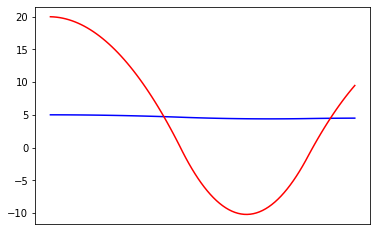

In [0]:
plt.xticks([])
plt.plot([i for i in range(len(training_loss_List))],training_loss_List,color='blue')
plt.plot([i for i in range(len(testing_loss_List))],testing_loss_List,color='red')

#2.plot the training accuracy (%) at every iteration of gradient descent using the training data (blue)  & plot the testing accuracy (%) at every iteration of gradient descent using the testing data (red) / in one figure

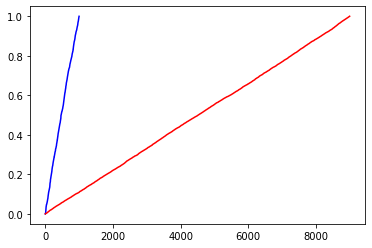

In [139]:
plt.plot([i for i in range(len(training_accuracy_List))],training_accuracy_List,color='blue')
plt.plot([i for i in range(len(testing_accuracy_List))],testing_accuracy_List,color='red')

#3. print the final training accuracy (%) using the training data  & print the final testing accuracy (%) using the testing data 

In [138]:
print(max(training_accuracy_List))
print(max(testing_accuracy_List))


0.8126043729591017
0.8836442332624197


#4. Plot the classification example(present 10 correctly classified testing images with their labels at the title of each sub-figure in 2x5 array &present 10 misclassified testing images with their misclassified labels at the title of each sub-figure in 2x5 array)